# Question and Answer Chat Bots

## Loading the Data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698


In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 137kB/s 
     |████████████████████████████████| 983kB 41.6MB/s 
     |████████████████████████████████| 266kB 48.8MB/s 
     |████████████████████████████████| 1.3MB 47.6MB/s 
     |████████████████████████████████| 1.1MB 51.6MB/s 
     |████████████████████████████████| 471kB 47.1MB/s 
     |████████████████████████████████| 2.9MB 46.3MB/s 
     |████████████████████████████████| 890kB 33.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.2-cp36-none-any.whl size=25276306 sha256=c36bc4364e1085116bd34eeff648de72d61601f8473d694607217b0aaa81dd5b
  Stored in directory: /root/.cache/pip/wheels/fe/56/00/25444c352cc843e5c5daea0e9517a192878ae22c2c6b5f4573
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=f9720f642367670bbaeb6694d3dfc3b7cf38598cf057561abde77c7c8cbde9fd
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for syn

In [3]:
import ktrain
from ktrain import text

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
with open("/content/drive/MyDrive/Colab Notebooks/nlp_scripts/hw4_babi_dataset/train_qa.txt", "rb") as trn:   # Unpickling
    train_data =  pickle.load(trn)

In [6]:
with open("/content/drive/MyDrive/Colab Notebooks/nlp_scripts/hw4_babi_dataset/test_qa.txt", "rb") as tst:   # Unpickling
    test_data =  pickle.load(tst)

In [7]:
type(train_data)

list

In [8]:
train_data[1]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 'no')

In [9]:
train_df = pd.DataFrame(train_data, columns=['answers', 'question', 'label'])
train_df.head()

,answers,question,label
0,"[Mary, moved, to, the, bathroom, ., Sandra, jo...","[Is, Sandra, in, the, hallway, ?]",no
1,"[Mary, moved, to, the, bathroom, ., Sandra, jo...","[Is, Daniel, in, the, bathroom, ?]",no
2,"[Mary, moved, to, the, bathroom, ., Sandra, jo...","[Is, Daniel, in, the, office, ?]",no
3,"[Mary, moved, to, the, bathroom, ., Sandra, jo...","[Is, Daniel, in, the, bedroom, ?]",yes
4,"[Mary, moved, to, the, bathroom, ., Sandra, jo...","[Is, Daniel, in, the, bedroom, ?]",yes


In [10]:
test_df = pd.DataFrame(test_data, columns=['answers', 'question', 'label'])
test_df.head()

,answers,question,label
0,"[Mary, got, the, milk, there, ., John, moved, ...","[Is, John, in, the, kitchen, ?]",no
1,"[Mary, got, the, milk, there, ., John, moved, ...","[Is, John, in, the, kitchen, ?]",no
2,"[Mary, got, the, milk, there, ., John, moved, ...","[Is, John, in, the, garden, ?]",yes
3,"[Mary, got, the, milk, there, ., John, moved, ...","[Is, Daniel, in, the, bathroom, ?]",yes
4,"[Mary, got, the, milk, there, ., John, moved, ...","[Is, Daniel, in, the, bedroom, ?]",no


In [11]:
print( len(train_df) )
print( len(test_df) )

10000
1000


In [12]:
print( train_df['answers'][0] )
print( train_df['question'][0] )

['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.']
['Is', 'Sandra', 'in', 'the', 'hallway', '?']


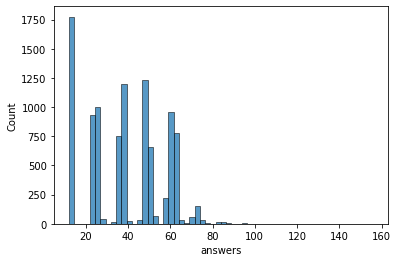

In [13]:
# visualize #words 
sns.histplot(data=train_df['answers'].str.len())

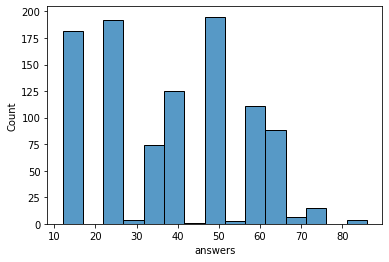

In [14]:
sns.histplot(data=test_df['answers'].str.len())

In [15]:
train_df['answers'] = train_df['answers'].apply( lambda x: ' '.join(x) )
train_df['question'] = train_df['question'].apply( lambda x: ' '.join(x) )

In [16]:
train_df.head()

,answers,question,label
0,Mary moved to the bathroom . Sandra journeyed ...,Is Sandra in the hallway ?,no
1,Mary moved to the bathroom . Sandra journeyed ...,Is Daniel in the bathroom ?,no
2,Mary moved to the bathroom . Sandra journeyed ...,Is Daniel in the office ?,no
3,Mary moved to the bathroom . Sandra journeyed ...,Is Daniel in the bedroom ?,yes
4,Mary moved to the bathroom . Sandra journeyed ...,Is Daniel in the bedroom ?,yes


In [17]:
test_df['answers'] = test_df['answers'].apply( lambda x: ' '.join(x) )
test_df['question'] = test_df['question'].apply( lambda x: ' '.join(x) )

In [18]:
test_df.head()

,answers,question,label
0,Mary got the milk there . John moved to the be...,Is John in the kitchen ?,no
1,Mary got the milk there . John moved to the be...,Is John in the kitchen ?,no
2,Mary got the milk there . John moved to the be...,Is John in the garden ?,yes
3,Mary got the milk there . John moved to the be...,Is Daniel in the bathroom ?,yes
4,Mary got the milk there . John moved to the be...,Is Daniel in the bedroom ?,no


In [19]:
x_train = train_df[['answers', 'question']].values
y_train = train_df['label'].values
x_test = test_df[['answers', 'question']].values
y_test = test_df['label'].values

In [20]:
x_train

array([['Mary moved to the bathroom . Sandra journeyed to the bedroom .',
        'Is Sandra in the hallway ?'],
       ['Mary moved to the bathroom . Sandra journeyed to the bedroom . Mary went back to the bedroom . Daniel went back to the hallway .',
        'Is Daniel in the bathroom ?'],
       ['Mary moved to the bathroom . Sandra journeyed to the bedroom . Mary went back to the bedroom . Daniel went back to the hallway . Sandra went to the kitchen . Daniel went back to the bathroom .',
        'Is Daniel in the office ?'],
       ...,
       ['Daniel went to the office . Sandra journeyed to the hallway . Daniel went back to the bedroom . Mary got the apple there . Sandra moved to the bathroom . Mary journeyed to the bedroom .',
        'Is Sandra in the hallway ?'],
       ['Daniel went to the office . Sandra journeyed to the hallway . Daniel went back to the bedroom . Mary got the apple there . Sandra moved to the bathroom . Mary journeyed to the bedroom . Mary put down the appl

In [21]:
x_train = list(map(tuple, x_train))
x_test = list(map(tuple, x_test))

In [22]:
print(x_train[0])
print(y_train[0])

('Mary moved to the bathroom . Sandra journeyed to the bedroom .', 'Is Sandra in the hallway ?')
no


In [23]:
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=128, class_names=['no', 'yes'])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()


preprocessing train...
language: en
sentence pairs detected


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
sentence pairs detected


In [24]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32) # lower bs if OOM occurs
learner.fit_onecycle(5e-5, 3)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/3
313/313 [==============================] - 133s 425ms/step - loss: 0.4895 - accuracy: 0.7272 - val_loss: 0.3470 - val_accuracy: 0.8550
Epoch 2/3
313/313 [==============================] - 133s 424ms/step - loss: 0.3143 - accuracy: 0.8604 - val_loss: 0.2242 - val_accuracy: 0.8940
Epoch 3/3
313/313 [==============================] - 133s 424ms/step - loss: 0.1273 - accuracy: 0.9460 - val_loss: 0.0285 - val_accuracy: 0.9910


In [25]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

          no       0.99      0.99      0.99       503
         yes       0.99      0.99      0.99       497

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



array([[497,   6],
       [  3, 494]])

Even though model above gives us very good accuracy(99%), below are a few 6-layered model types - distilroberta-base & distilbert-base-cased-distilled-squad

In [26]:
MODEL_NAME = 'distilroberta-base'
t = text.Transformer(MODEL_NAME, maxlen=128, class_names=['no', 'yes'])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()

learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32) # lower bs if OOM occurs
learner.fit_onecycle(5e-5, 3)


preprocessing train...
language: en
sentence pairs detected


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
sentence pairs detected





begin training using onecycle policy with max lr of 5e-05...
Epoch 1/3
313/313 [==============================] - 139s 443ms/step - loss: 0.5222 - accuracy: 0.6913 - val_loss: 0.3498 - val_accuracy: 0.8270
Epoch 2/3
313/313 [==============================] - 137s 437ms/step - loss: 0.2398 - accuracy: 0.8978 - val_loss: 0.0277 - val_accuracy: 0.9950
Epoch 3/3
313/313 [==============================] - 137s 437ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 4.4009e-04 - val_accuracy: 1.0000


In [27]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       503
         yes       1.00      1.00      1.00       497

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



array([[503,   0],
       [  0, 497]])

In [28]:
MODEL_NAME = 'distilbert-base-cased-distilled-squad'
t = text.Transformer(MODEL_NAME, maxlen=128, class_names=['no', 'yes'])
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()

learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32) # lower bs if OOM occurs
learner.fit_onecycle(5e-5, 3)



preprocessing train...
language: en
sentence pairs detected


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
sentence pairs detected





begin training using onecycle policy with max lr of 5e-05...
Epoch 1/3
313/313 [==============================] - 134s 429ms/step - loss: 0.3767 - accuracy: 0.7989 - val_loss: 0.0320 - val_accuracy: 0.9860
Epoch 2/3
313/313 [==============================] - 132s 422ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/3
313/313 [==============================] - 132s 423ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 8.6639e-04 - val_accuracy: 1.0000


In [29]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       503
         yes       1.00      1.00      1.00       497

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



array([[503,   0],
       [  0, 497]])

##
All models work very well on this dataset. It gives us 100% accuracy in as less as 3 epochs.